<h3 style="color:#e7d3d3"> Building LSTM Model To Forecast PM2.5 </h3>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


2025-04-21 16:35:36.073806: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-21 16:35:36.327386: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-21 16:35:36.541633: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745233536.751511    2363 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745233536.807413    2363 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745233537.216067    2363 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [2]:
model = load_model("/home/madhav/dev/PureDelhi/models/lstm_pm2.5.keras")

2025-04-21 16:35:42.331864: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [3]:
columns = ["Timestamp","PM2.5","sin_month","cos_month","sin_day","cos_day"]
train = pd.read_csv("/home/madhav/dev/PureDelhi/data/training_data.csv",
                 parse_dates=["Timestamp"],
                 usecols=columns)
                                                    
test = pd.read_csv("/home/madhav/dev/PureDelhi/data/test_data.csv",
                  parse_dates=["Timestamp"],
                 usecols=columns)

train = train.set_index("Timestamp")
test  = test.set_index("Timestamp")

In [4]:
train.head()

,PM2.5,sin_month,cos_month,sin_day,cos_day
Timestamp,,,,,
2017-01-01 00:00:00,5.156466,0.5,0.866025,0.000000,1.000000
2017-01-01 01:00:00,5.416856,0.5,0.866025,0.258819,0.965926
2017-01-01 02:00:00,5.346393,0.5,0.866025,0.500000,0.866025
2017-01-01 03:00:00,5.367494,0.5,0.866025,0.707107,0.707107
2017-01-01 04:00:00,5.234845,0.5,0.866025,0.866025,0.500000


In [5]:
scaler = MinMaxScaler()
train_scaled  = scaler.fit_transform(train[["PM2.5"]])
test_scaled = scaler.transform(test[["PM2.5"]])

In [6]:
train["PM2.5"] = train_scaled
test["PM2.5"]  = test_scaled

In [7]:
train.head()

,PM2.5,sin_month,cos_month,sin_day,cos_day
Timestamp,,,,,
2017-01-01 00:00:00,0.741506,0.5,0.866025,0.000000,1.000000
2017-01-01 01:00:00,0.782595,0.5,0.866025,0.258819,0.965926
2017-01-01 02:00:00,0.771476,0.5,0.866025,0.500000,0.866025
2017-01-01 03:00:00,0.774806,0.5,0.866025,0.707107,0.707107
2017-01-01 04:00:00,0.753874,0.5,0.866025,0.866025,0.500000


In [8]:
test.head()

,PM2.5,sin_month,cos_month,sin_day,cos_day
Timestamp,,,,,
2023-12-31 23:00:00,0.752183,-2.449294e-16,1.000000,-0.258819,0.965926
2024-01-01 00:00:00,0.741005,5.000000e-01,0.866025,0.000000,1.000000
2024-01-01 01:00:00,0.739998,5.000000e-01,0.866025,0.258819,0.965926
2024-01-01 02:00:00,0.739400,5.000000e-01,0.866025,0.500000,0.866025
2024-01-01 03:00:00,0.741233,5.000000e-01,0.866025,0.707107,0.707107


I0000 00:00:1745233543.820727    2408 service.cc:152] XLA service 0x7b1168006ee0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1745233543.820775    2408 service.cc:160]   StreamExecutor device (0): Host, Default Version
2025-04-21 16:35:43.922604: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.


  5/216 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step  

I0000 00:00:1745233544.410179    2408 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


216/216 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step


<Axes: title={'center': 'Testset Predictions with 1 week avg'}, xlabel='Timestamp', ylabel='PM2.5'>

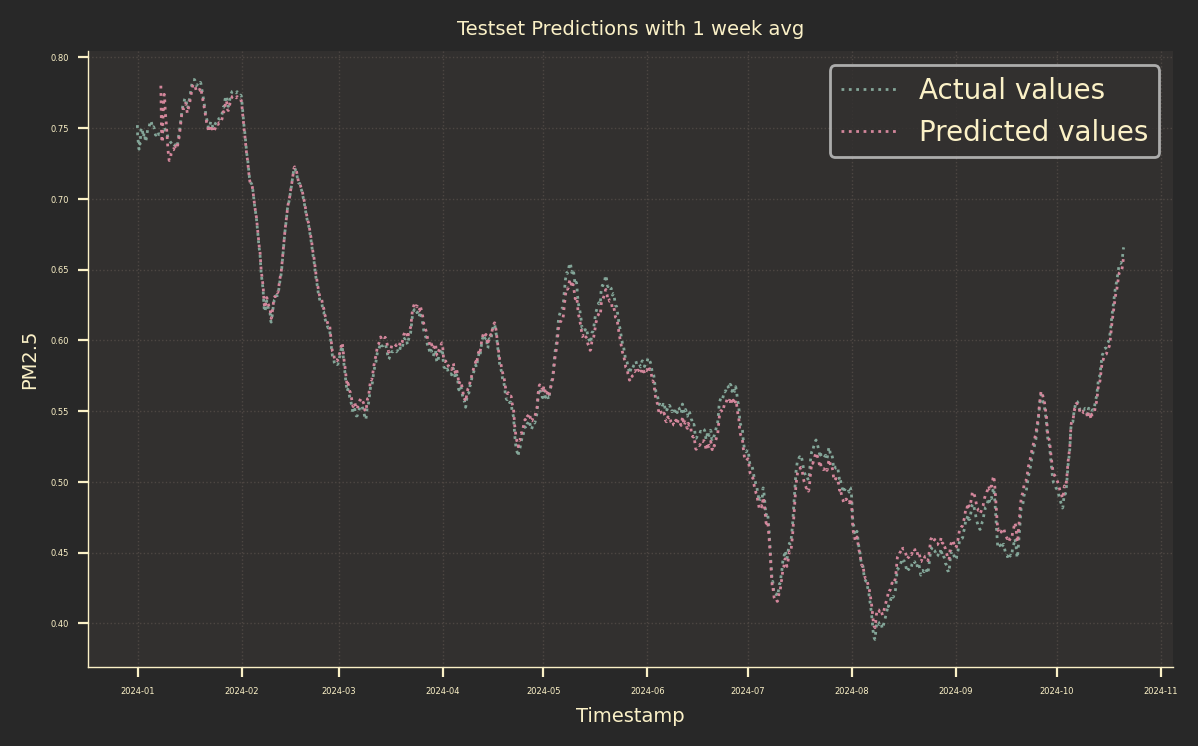

/home/madhav/dev/PureDelhi/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
16:35:57 - cmdstanpy - INFO - Chain [1] start processing
16:36:43 - cmdstanpy - INFO - Chain [1] done processing
/home/madhav/dev/PureDelhi/venv/lib/python3.11/site-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


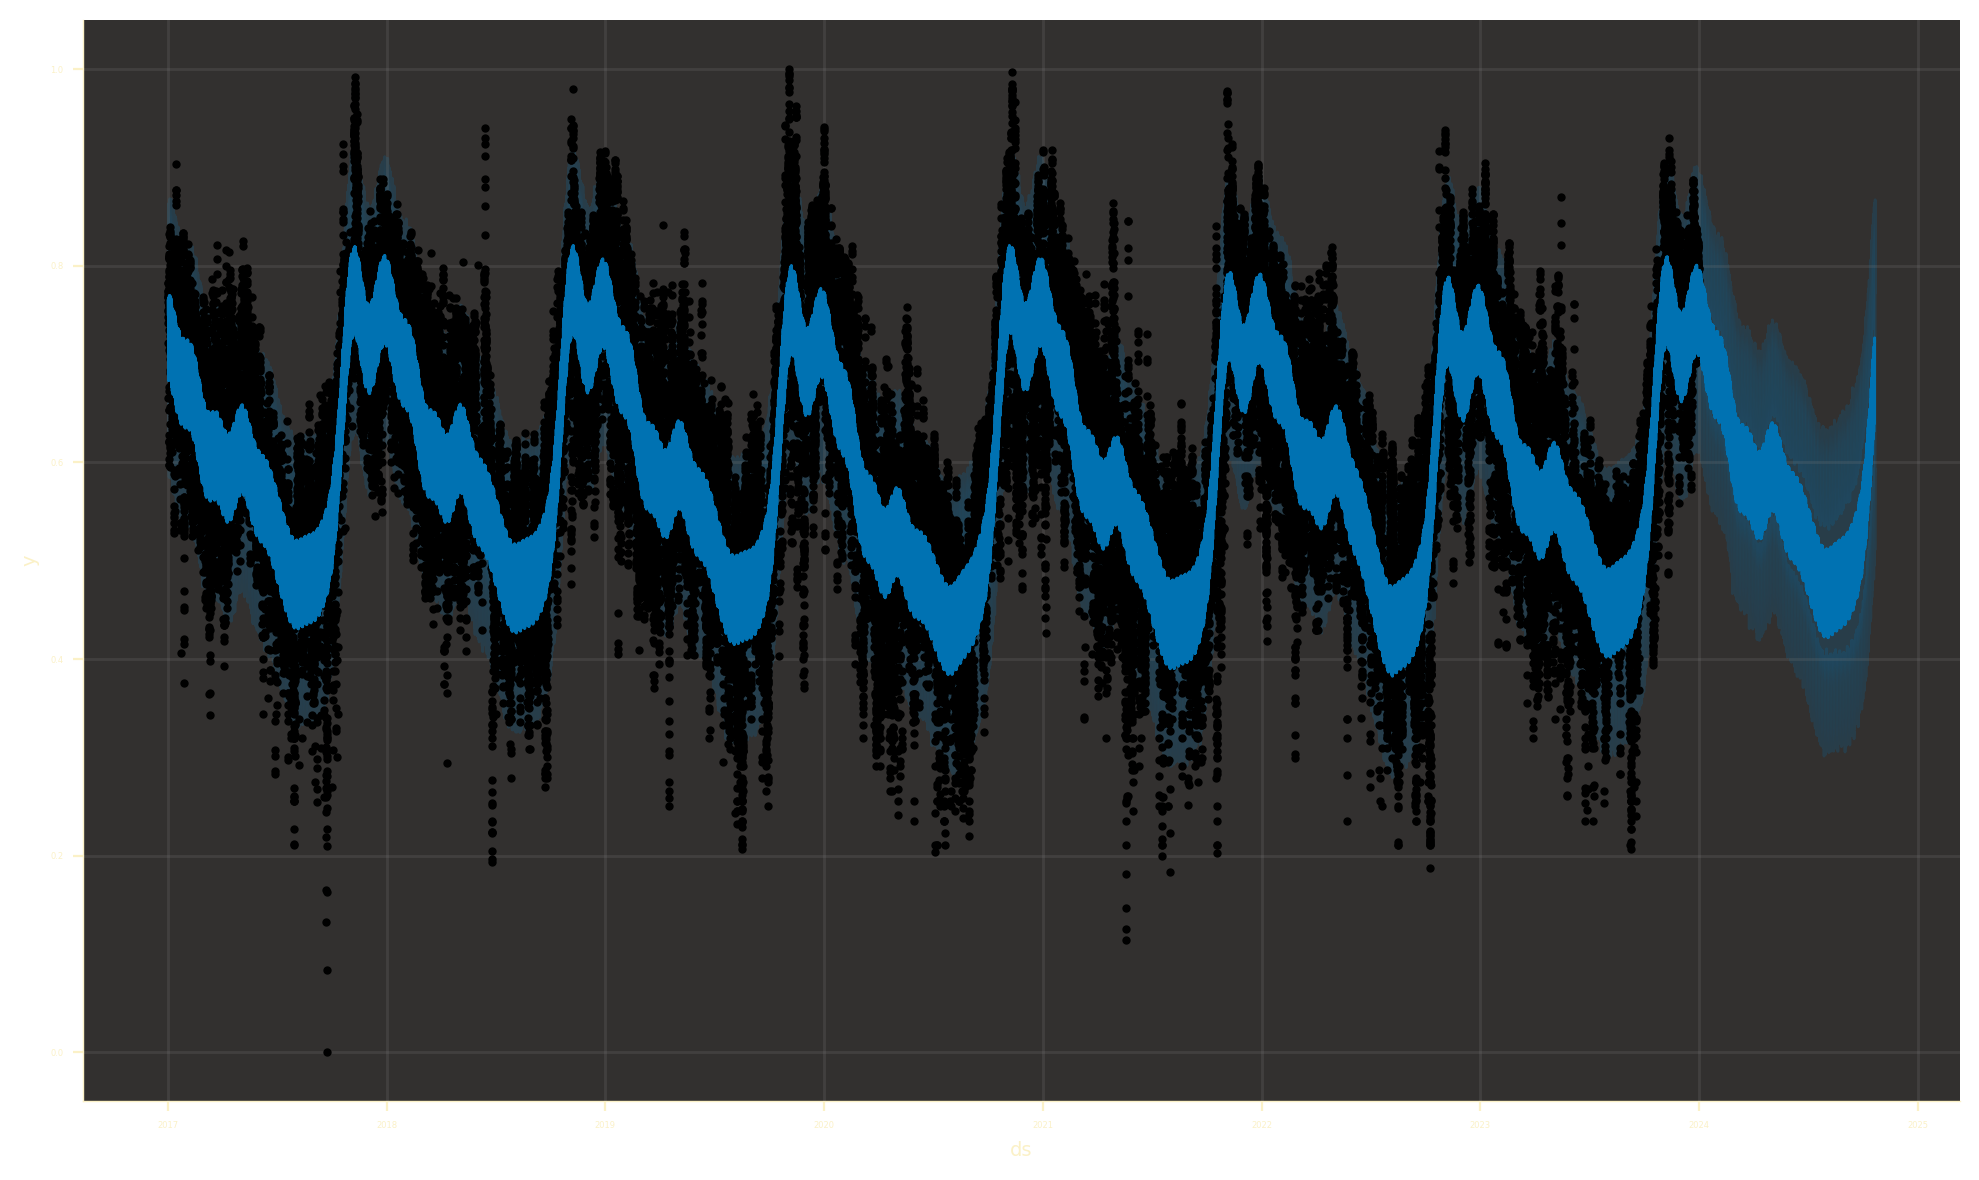

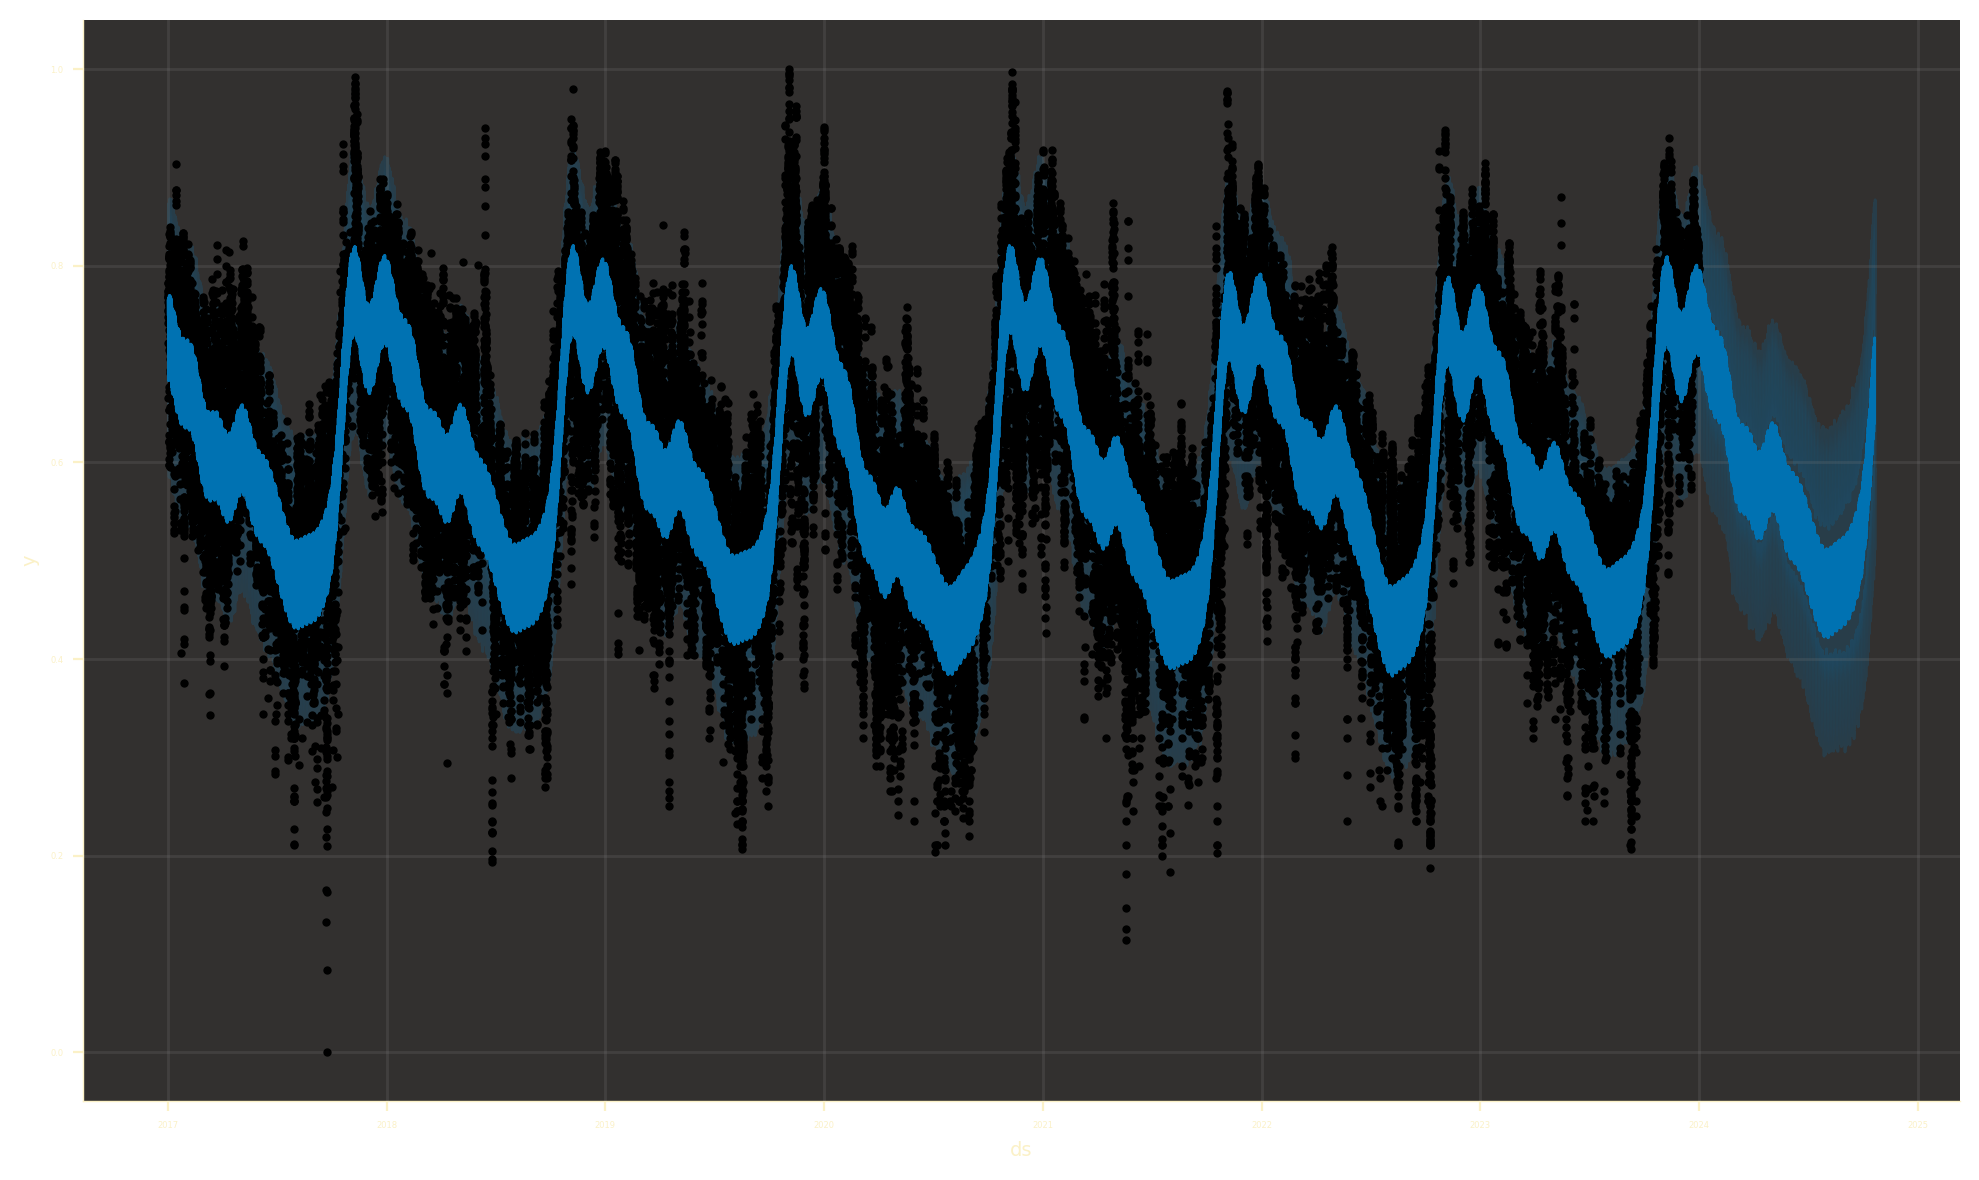

In [12]:

from prophet import Prophet
import pandas as pd

# Tumhara data: 'ds' (datetime) aur 'y' (AQI)
df = pd.DataFrame()
df['ds'] = pd.to_datetime(train.index)  # timestamp column ko datetime me convert karo
df['y'] = train["PM2.5"].values  # y column me AQI

# Model setup
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True
)
model.fit(df)

# Future dataframe (1 saal = 365 din)
future = model.make_future_dataframe(periods=7057, freq='H')
forecast = model.predict(future)

# Plot
model.plot(forecast)


<Axes: xlabel='Timestamp', ylabel='PM2.5'>

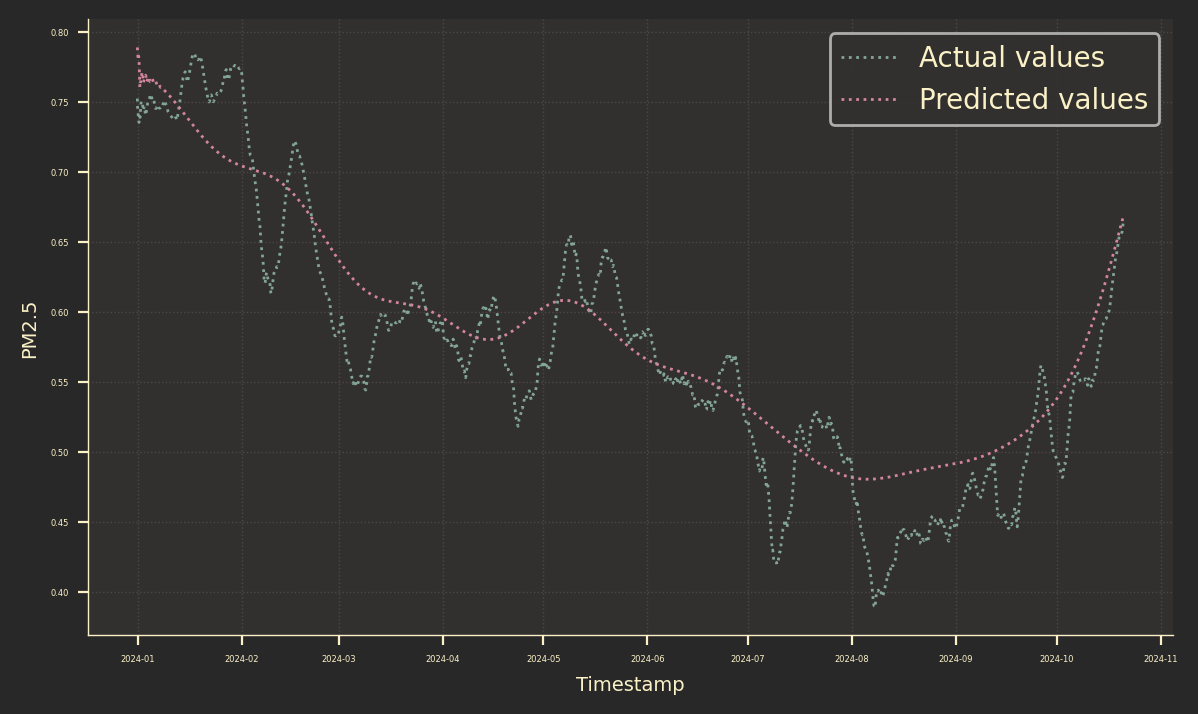

In [19]:
pred = forecast[-7057:]["yhat"]
sns.lineplot(x=test.index,y=test["PM2.5"].rolling(168,min_periods=1).mean(),color="C2",label="Actual values",linestyle=':')
sns.lineplot(x=test.index,y=pred.rolling(168,min_periods=1).mean(),color="C3",label = "Predicted values",linestyle=":")

In [ ]:

batch = train[-7:].values.reshape(1, 7, 3)  # Shape: (1, 7, 3)
time = train.index[-1]  # Last timestamp in training data
regressive_forecaste_7day = []

# Step 2: Predict next 7 days iteratively
for i in range(7):
    # Predict next day's AQI
    next_aqi = model.predict(batch)[0][0]  # Shape: (1, 1) -> scalar
    
    # Update time for next prediction
    time += timedelta(days=1)
    
    # Generate time features for the NEXT day
    sin_month = np.sin(2 * np.pi * time.month / 12)
    cos_month = np.cos(2 * np.pi * time.month / 12)
    
    regressive_forecaste_7day.append(next_aqi)
    
    next_input = np.array([next_aqi[0], sin_month, cos_month]).reshape(1, 1, 3)
    batch = np.concatenate([batch[:, 1:, :], next_input], axis=1)

